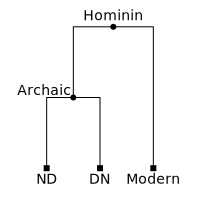

In [21]:
# https://www.cell.com/cell/fulltext/S0092-8674(20)30059-3?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867420300593%3Fshowall%3Dtrue#sec4
# https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1008895&utm_source=yxnews&utm_medium=mobile&utm_referrer=https%3A%2F%2Fyandex.kz%2Fnews%2Fstory%2FUchenye_nashli_v_genome_cheloveka_DNK_neizvestnogo_predka--e3c895f1222db5d54204179ebfabd235#abstract0
import tskit

tables = tskit.TableCollection(1)
for _ in range(3):
    tables.nodes.add_row(flags=tskit.NODE_IS_SAMPLE)
AB = tables.nodes.add_row(time=10)
ABC = tables.nodes.add_row(time=20)
tables.edges.add_row(0, 1, AB, 0)
tables.edges.add_row(0, 1, AB, 1)
tables.edges.add_row(0, 1, ABC, 2)
tables.edges.add_row(0, 1, ABC, AB)
tables.sort()

tree = tables.tree_sequence().first()
SVG(tree.draw_svg(node_labels={0:"ND", 1:"DN", 2:"Modern", 3:"Archaic", 4:"Hominin"}))

In [22]:
import math

# Times are provided in years, so we convert into generations.
generation_time = 29
T_HOM = 575e3 / generation_time
T_ARC = 415e3 / generation_time

# We need to work out the starting population sizes based on
# the growth rates provided for these two populations
N_HOM = 18500
N_ARC = 7100
N_ND = 3400
N_DN = 2500
N_HUM = 23700

speed_of_growth = 0.75

In [23]:
demography = msprime.Demography()

demography.add_population(
    name="HOM",
    description="Hominin",
    initial_size=N_HOM,
    growth_rate=speed_of_growth,
)
demography.add_population(
    name="ARC",
    description=(
        "Archaic"
    ),
    initial_size=N_ARC,
    growth_rate=speed_of_growth,
)
demography.add_population(
    name="ND",
    description="Neanderthal",
    initial_size=N_ND,
    growth_rate=speed_of_growth,
)
demography.add_population(
    name="DN",
    description="Denisovan",
    initial_size=N_DN,
    growth_rate=speed_of_growth,
)
demography.add_population(
    name="HUM",
    description="Modern human",
    initial_size=N_HUM,
    growth_rate=speed_of_growth,
)
demography

id,name,description,initial_size,growth_rate,default_sampling_time,extra_metadata
0,HOM,Hominin,18500.0,0.75,0,{}
1,ARC,Archaic,7100.0,0.75,0,{}
2,ND,Neanderthal,3400.0,0.75,0,{}
3,DN,Denisovan,2500.0,0.75,0,{}
4,HUM,Modern human,23700.0,0.75,0,{}


In [24]:
demography.add_population_split(time=T_HOM, derived=["ARC", "HUM"], ancestral="HOM")
demography.add_population_split(time=T_ARC, derived=["ND", "DN"], ancestral="ARC")
demography.sort_events()
demography

Demography(populations=[Population(initial_size=18500, growth_rate=0.75, name='HOM', description='Hominin', extra_metadata={}, default_sampling_time=19827.58620689655, initially_active=False, id=0), Population(initial_size=7100, growth_rate=0.75, name='ARC', description='Archaic', extra_metadata={}, default_sampling_time=14310.344827586207, initially_active=False, id=1), Population(initial_size=3400, growth_rate=0.75, name='ND', description='Neanderthal', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=2500, growth_rate=0.75, name='DN', description='Denisovan', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=23700, growth_rate=0.75, name='HUM', description='Modern human', extra_metadata={}, default_sampling_time=None, initially_active=None, id=4)], events=[PopulationSplit(time=14310.344827586207, derived=['ND', 'DN'], ancestral='ARC'), PopulationSplit(time=19827.58620689655, derived=['ARC', 'HUM'], ancestral='HOM')], migration_matrix=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]))

In [25]:
ts = msprime.sim_ancestry({"HUM": 4}, demography=demography)
ts